### END experiment 11 March 2019 24:00 for weather calculations

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import lifelines
from lifelines.utils import datetimes_to_durations
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.preprocessing import  LabelEncoder
import lifelines as sa
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('df_cox_master.csv')
df.columns

Index(['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'midpoint_Latitude', 'midpoint_Longitude', 'weather_station', 'Sum'],
      dtype='object')

In [3]:
len(df)

940

In [4]:
df.isnull().sum()

Asset_Number                0
ELR                         0
High_Level_Asset_Class      0
Asset_Class_Grouping        0
Grouping_Full_Name          0
Engineering_Suffix          0
System_Asset_Type           0
EQUIP_CLASS_DESC            0
birth                       0
death                     637
event                       0
duration                    0
T                           0
Start_Latitude              0
Start_Longitude             0
End_Latitude               34
End_Longitude              34
midpoint_Latitude          34
midpoint_Longitude         34
weather_station             0
Sum                       293
dtype: int64

In [5]:
df.birth.max(), df.birth.min()

('31/12/2017 13:55', '01/01/2017 09:00')

In [6]:
#df.death.max(), df.death.min()# not possible because of censored data

In [7]:
df.weather_station.unique()

array(['Leeds', 'York', 'Manchester', 'Mirfield', 'Huddersfield'],
      dtype=object)

In [8]:
# def event_observed(x):
#     if pd.isnull(x.death):
#         return 0
#     else:
#         return 1

In [9]:
# df['event_happens']=df.apply(lambda row: event_observed(row), axis=1 )

In [10]:
df.columns

Index(['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'midpoint_Latitude', 'midpoint_Longitude', 'weather_station', 'Sum'],
      dtype='object')

In [11]:
df_r=df[['event',  'T', 'Asset_Number','ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC','birth', 'death','Sum', 'weather_station']] # classtype

In [12]:
df_r['Sum'].fillna(0, inplace=True)

In [13]:
df_r.isnull().sum()

event                       0
T                           0
Asset_Number                0
ELR                         0
High_Level_Asset_Class      0
Asset_Class_Grouping        0
Grouping_Full_Name          0
Engineering_Suffix          0
System_Asset_Type           0
EQUIP_CLASS_DESC            0
birth                       0
death                     637
Sum                         0
weather_station             0
dtype: int64

In [14]:
df_r1=df_r.drop_duplicates(subset=['Asset_Number'], keep='last')

In [15]:
len(df_r1)

637

In [16]:
df_r1.to_csv('./AFI/data/master.csv', index=False)

In [14]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()
le6 = LabelEncoder()
le5 = LabelEncoder()
le7 = LabelEncoder()
le8 = LabelEncoder()

In [15]:
df_r['ELR_enc'] = le1.fit_transform(df_r['ELR'].astype(str).values)
df_r['HLC_enc'] = le2.fit_transform(df_r['High_Level_Asset_Class'].astype(str).values)
df_r['Asset_Class_Grouping_enc'] = le3.fit_transform(df_r['Asset_Class_Grouping'].astype(str).values)
df_r['Grouping_Full_Name_enc'] = le4.fit_transform(df_r['Grouping_Full_Name'].astype(str).values)
df_r['Engineering_Suffix_enc'] = le5.fit_transform(df_r['Engineering_Suffix'].astype(str).values)
df_r['System_Asset_Type_enc'] = le6.fit_transform(df_r['System_Asset_Type'].astype(str).values)
df_r['EQUIP_CLASS_DESC_enc'] = le7.fit_transform(df_r['EQUIP_CLASS_DESC'].astype(str).values)
df_r['weather_station_enc'] = le8.fit_transform(df_r['weather_station'].astype(str).values)

In [16]:
## Create dummy variables
#df_dummy = pd.get_dummies(df_r, drop_first=False)

In [17]:
df_r.head()

,event,T,Asset_Number,ELR,High_Level_Asset_Class,Asset_Class_Grouping,Grouping_Full_Name,Engineering_Suffix,System_Asset_Type,EQUIP_CLASS_DESC,...,Sum,weather_station,ELR_enc,HLC_enc,Asset_Class_Grouping_enc,Grouping_Full_Name_enc,Engineering_Suffix_enc,System_Asset_Type_enc,EQUIP_CLASS_DESC_enc,weather_station_enc
0,0,267.106203,48075,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1
1,1,0.791435,48081,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1
2,1,40.656933,48081,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1
3,1,203.419444,48081,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1
4,0,443.199953,48081,DOL2,Track,Track,Track,TRACK (P.W),TRACK,Track ID ...,...,0.0,Leeds,4,3,8,9,24,86,40,1


In [18]:
df_r.columns

Index(['event', 'T', 'Asset_Number', 'ELR', 'High_Level_Asset_Class',
       'Asset_Class_Grouping', 'Grouping_Full_Name', 'Engineering_Suffix',
       'System_Asset_Type', 'EQUIP_CLASS_DESC', 'birth', 'death', 'Sum',
       'weather_station', 'ELR_enc', 'HLC_enc', 'Asset_Class_Grouping_enc',
       'Grouping_Full_Name_enc', 'Engineering_Suffix_enc',
       'System_Asset_Type_enc', 'EQUIP_CLASS_DESC_enc', 'weather_station_enc'],
      dtype='object')

In [19]:
df_dummy=df_r[['event', 'T',  'ELR_enc', 'HLC_enc',
       'Asset_Class_Grouping_enc', 'Grouping_Full_Name_enc',
       'Engineering_Suffix_enc', 'System_Asset_Type_enc',
       'EQUIP_CLASS_DESC_enc', 'weather_station_enc', 'Sum', 'Asset_Number']]

In [20]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'T', event_col='event',cluster_col='Asset_Number')   ## Fit the data to train the model
cph.print_summary() 

In [21]:
cph.predict_partial_hazard(df_dummy)
#cph.predict_survival_function(df_dummy)
#cph.predict_median(df_dummy)

,0
0,1.433497
1,1.433497
2,1.433497
3,1.433497
4,1.433497
...,...
935,1.501530
936,0.616234
937,0.687835
938,1.254485


In [22]:
cph.predict_survival_function(df_dummy)

,0,1,2,3,4,5,6,7,8,9,...,930,931,932,933,934,935,936,937,938,939
0.041667,0.997242,0.997242,0.997242,0.997242,0.997242,0.997898,0.997898,0.997898,0.997898,0.997868,...,0.997608,0.997610,0.998113,0.997909,0.997549,0.997112,0.998814,0.998676,0.997586,0.998274
0.427778,0.995861,0.995861,0.995861,0.995861,0.995861,0.996845,0.996845,0.996845,0.996845,0.996800,...,0.996410,0.996413,0.997168,0.996861,0.996322,0.995665,0.998219,0.998012,0.996377,0.997408
0.459028,0.994481,0.994481,0.994481,0.994481,0.994481,0.995791,0.995791,0.995791,0.995791,0.995733,...,0.995213,0.995216,0.996222,0.995814,0.995095,0.994220,0.997624,0.997348,0.995168,0.996543
0.791435,0.993100,0.993100,0.993100,0.993100,0.993100,0.994737,0.994737,0.994737,0.994737,0.994664,...,0.994014,0.994018,0.995276,0.994765,0.993867,0.992773,0.997028,0.996683,0.993959,0.995677
0.942361,0.991719,0.991719,0.991719,0.991719,0.991719,0.993683,0.993683,0.993683,0.993683,0.993595,...,0.992816,0.992820,0.994329,0.993717,0.992639,0.991328,0.996432,0.996018,0.992749,0.994811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796.970777,0.567547,0.567547,0.567547,0.567547,0.567547,0.649443,0.649443,0.649443,0.649443,0.645531,...,0.611928,0.612127,0.678836,0.650930,0.604550,0.552493,0.783881,0.762014,0.609146,0.701590
797.092303,0.567547,0.567547,0.567547,0.567547,0.567547,0.649443,0.649443,0.649443,0.649443,0.645531,...,0.611928,0.612127,0.678836,0.650930,0.604550,0.552493,0.783881,0.762014,0.609146,0.701590
797.158276,0.567547,0.567547,0.567547,0.567547,0.567547,0.649443,0.649443,0.649443,0.649443,0.645531,...,0.611928,0.612127,0.678836,0.650930,0.604550,0.552493,0.783881,0.762014,0.609146,0.701590
797.999005,0.567547,0.567547,0.567547,0.567547,0.567547,0.649443,0.649443,0.649443,0.649443,0.645531,...,0.611928,0.612127,0.678836,0.650930,0.604550,0.552493,0.783881,0.762014,0.609146,0.701590


In [23]:
cph.params_

ELR_enc                     0.013903
HLC_enc                     0.137721
Asset_Class_Grouping_enc    0.119910
Grouping_Full_Name_enc     -0.083138
Engineering_Suffix_enc     -0.055638
System_Asset_Type_enc       0.009245
EQUIP_CLASS_DESC_enc        0.025019
weather_station_enc        -0.095223
Sum                        -0.000325
dtype: float64

In [24]:
cph.baseline_hazard_

,baseline hazard
0.041667,0.001926
0.427778,0.000967
0.459028,0.000968
0.791435,0.000969
0.942361,0.000971
...,...
796.970777,0.000000
797.092303,0.000000
797.158276,0.000000
797.999005,0.000000


In [25]:
cph.baseline_cumulative_hazard_

,baseline cumulative hazard
0.041667,0.001926
0.427778,0.002893
0.459028,0.003861
0.791435,0.004830
0.942361,0.005801
...,...
796.970777,0.395140
797.092303,0.395140
797.158276,0.395140
797.999005,0.395140


In [26]:
cph.baseline_survival_

,baseline survival
0.041667,0.998075
0.427778,0.997111
0.459028,0.996147
0.791435,0.995181
0.942361,0.994216
...,...
796.970777,0.673586
797.092303,0.673586
797.158276,0.673586
797.999005,0.673586


In [27]:
cph.score_

0.6257123578507637

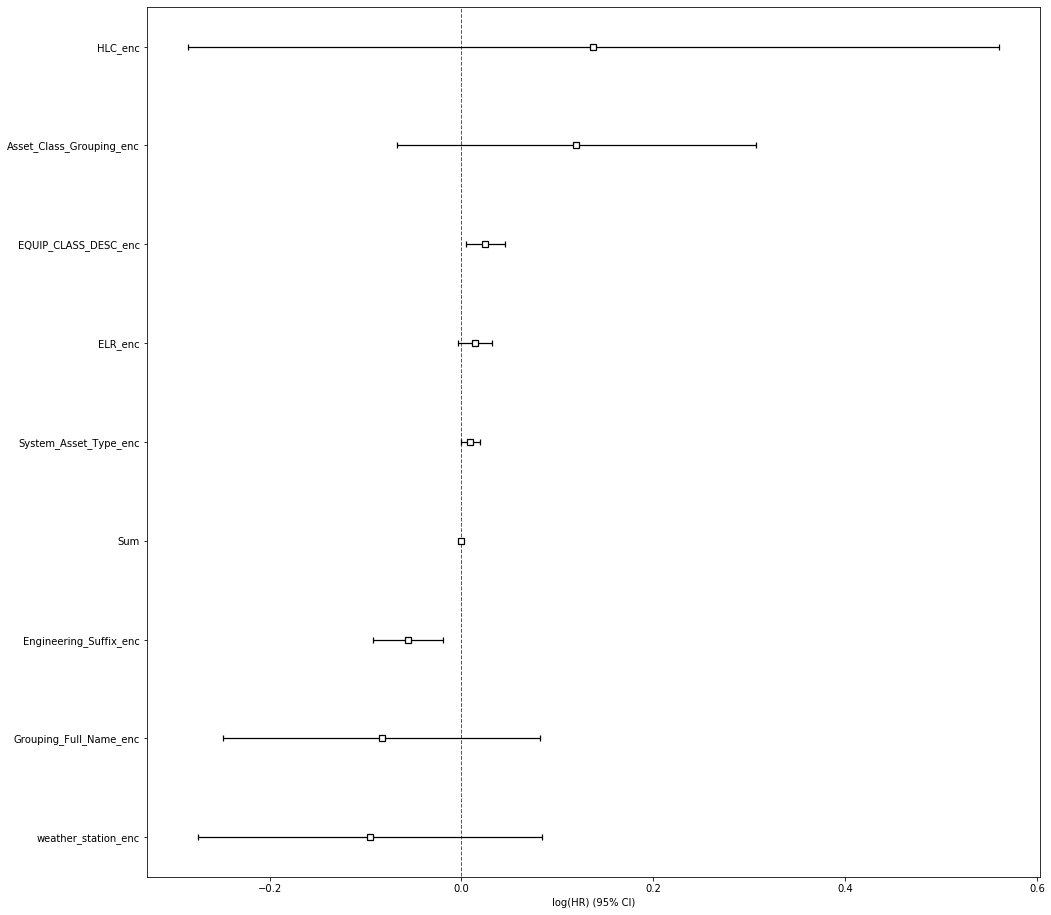

In [28]:
plt.figure(figsize=(16,16))
cph.plot()

In [29]:
tr_rows = df_dummy.iloc[156:180, 2:]
#tr_rows

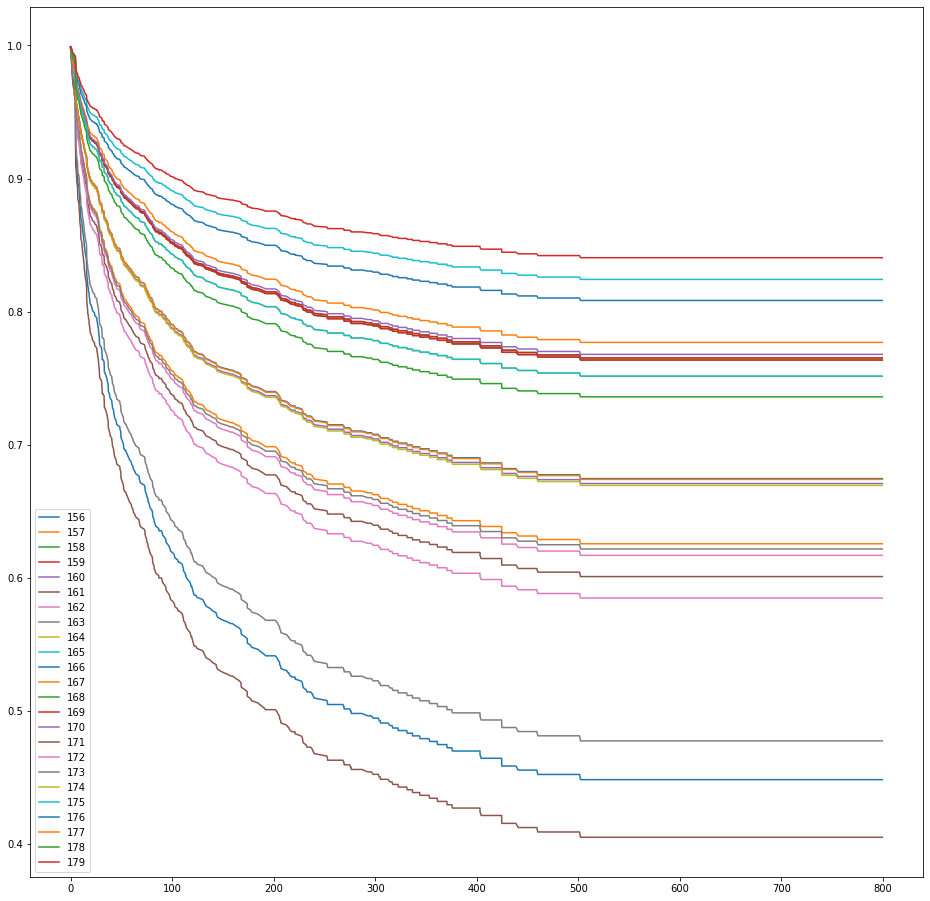

In [30]:

#prediction function some of the assets
cph.predict_survival_function(tr_rows).plot(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

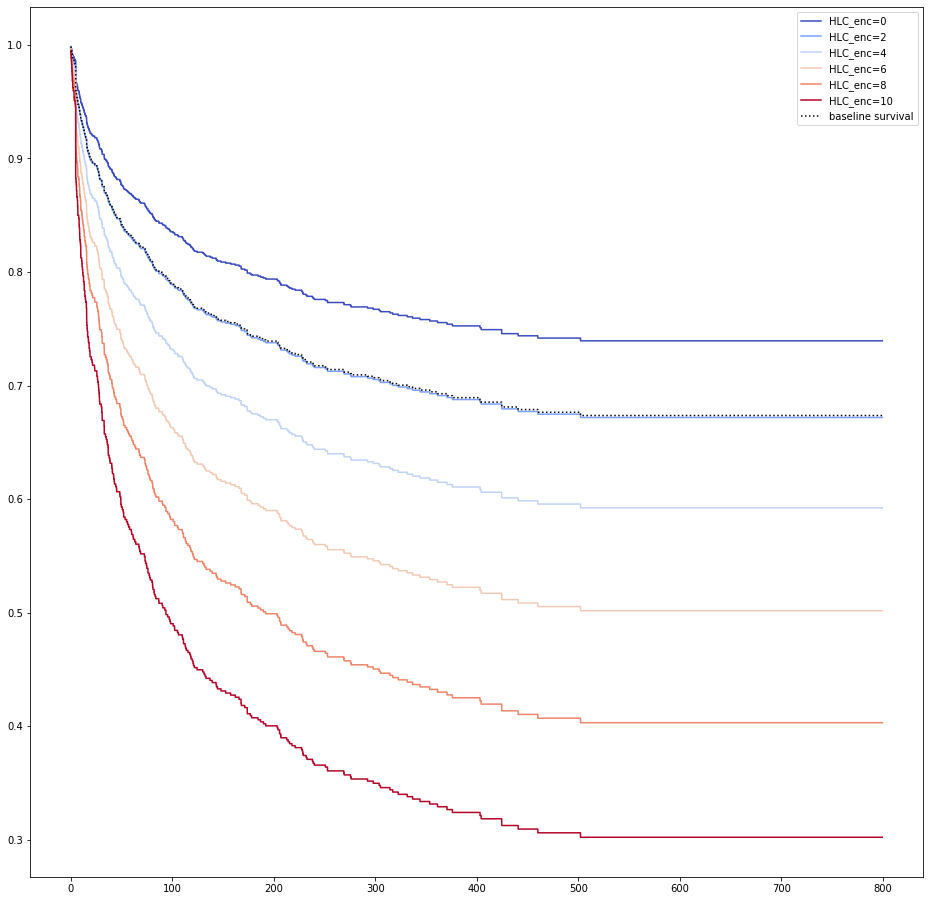

In [31]:
plt.figure(figsize=(16,16))
cph.plot_covariate_groups('HLC_enc', [0, 2, 4, 6, 8, 10], cmap='coolwarm',figsize=(16,16))

In [32]:
cph.check_assumptions(df_dummy)

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.





1. Variable 'weather_station_enc' failed the non-proportional test: p-value is 0.0002.

   Advice: with so few unique values (only 5), you can include `strata=['weather_station_enc', ...]`
in the call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



In [33]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'T', event_col='event',cluster_col='Asset_Number', strata=['weather_station_enc'])   ## Fit the data to train the model
cph.print_summary() 

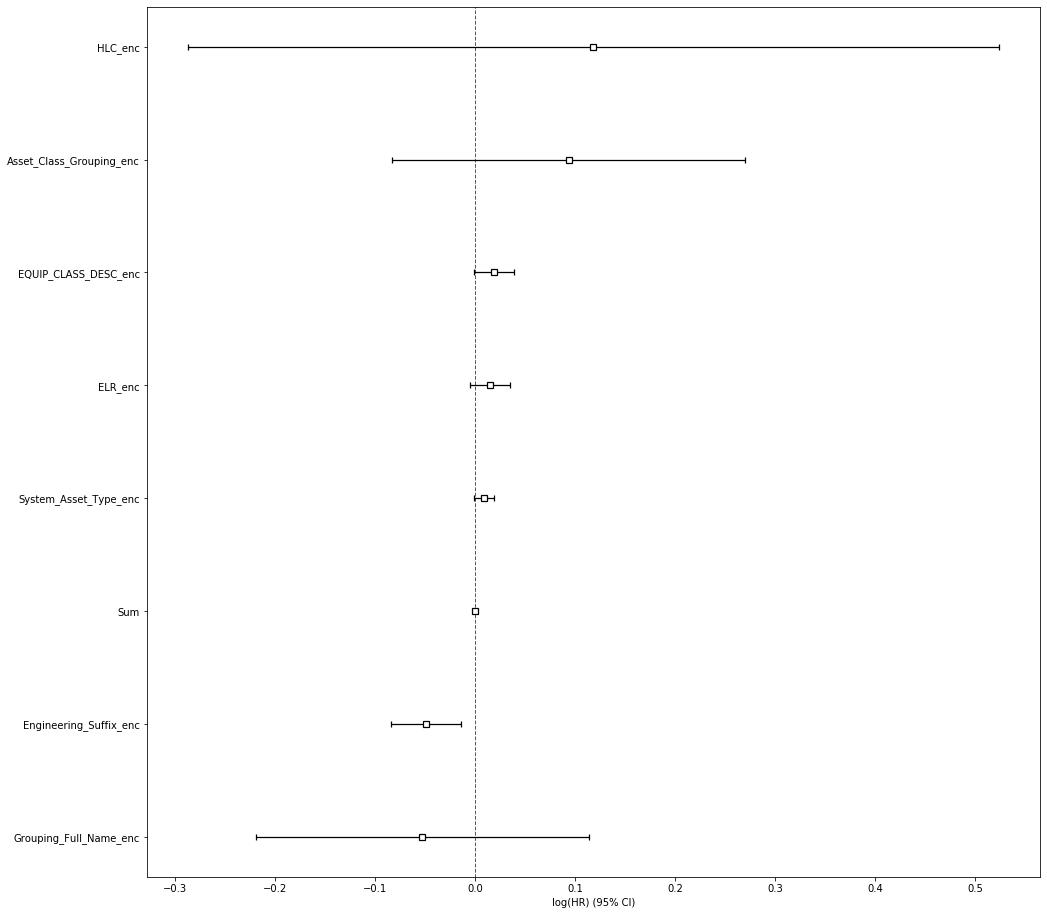

In [34]:
plt.figure(figsize=(16,16))
cph.plot()

<Figure size 1152x1152 with 0 Axes>

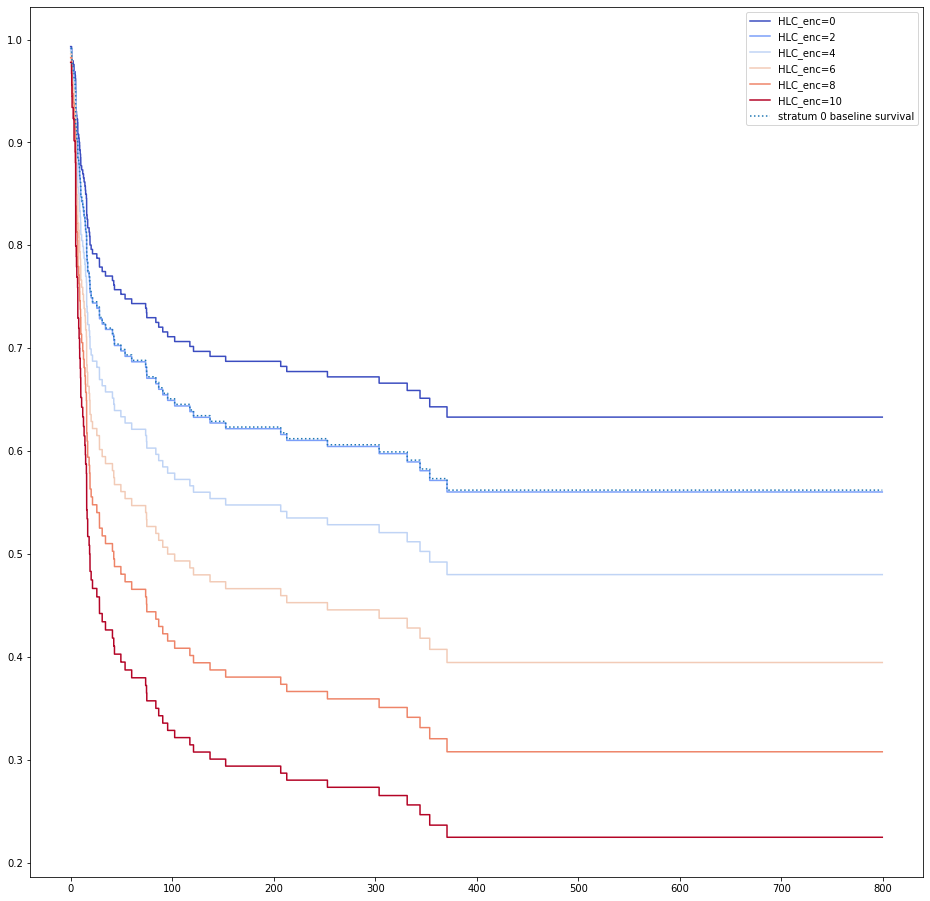

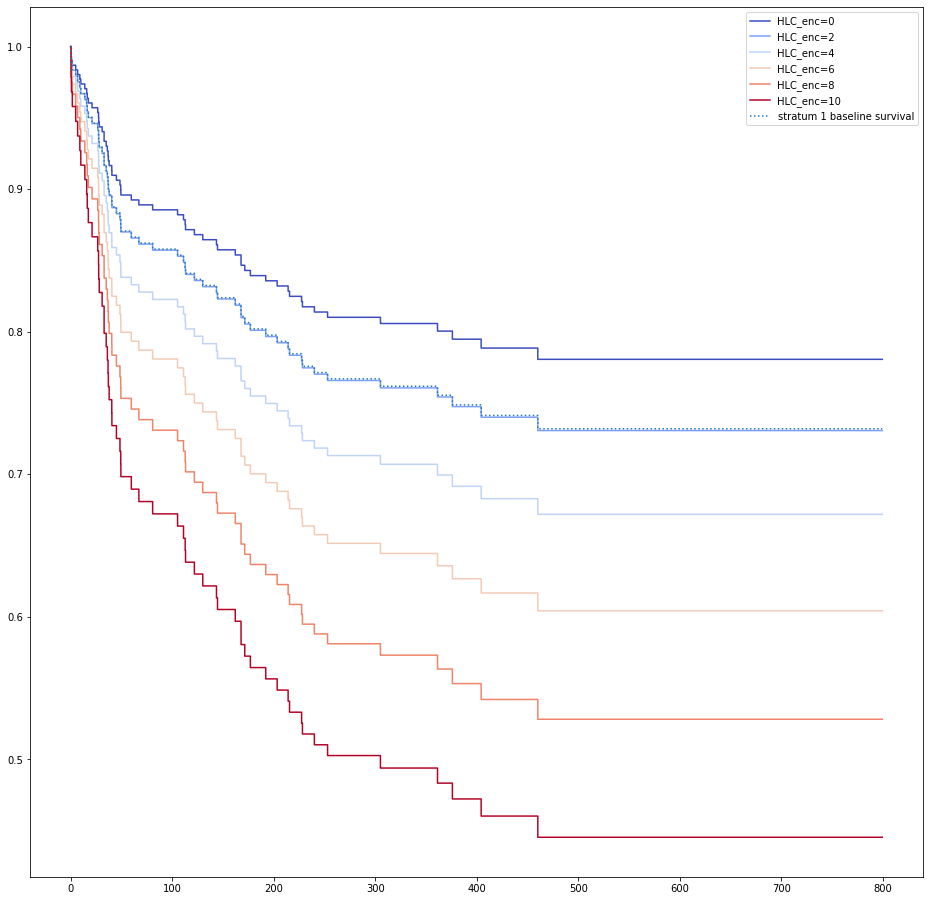

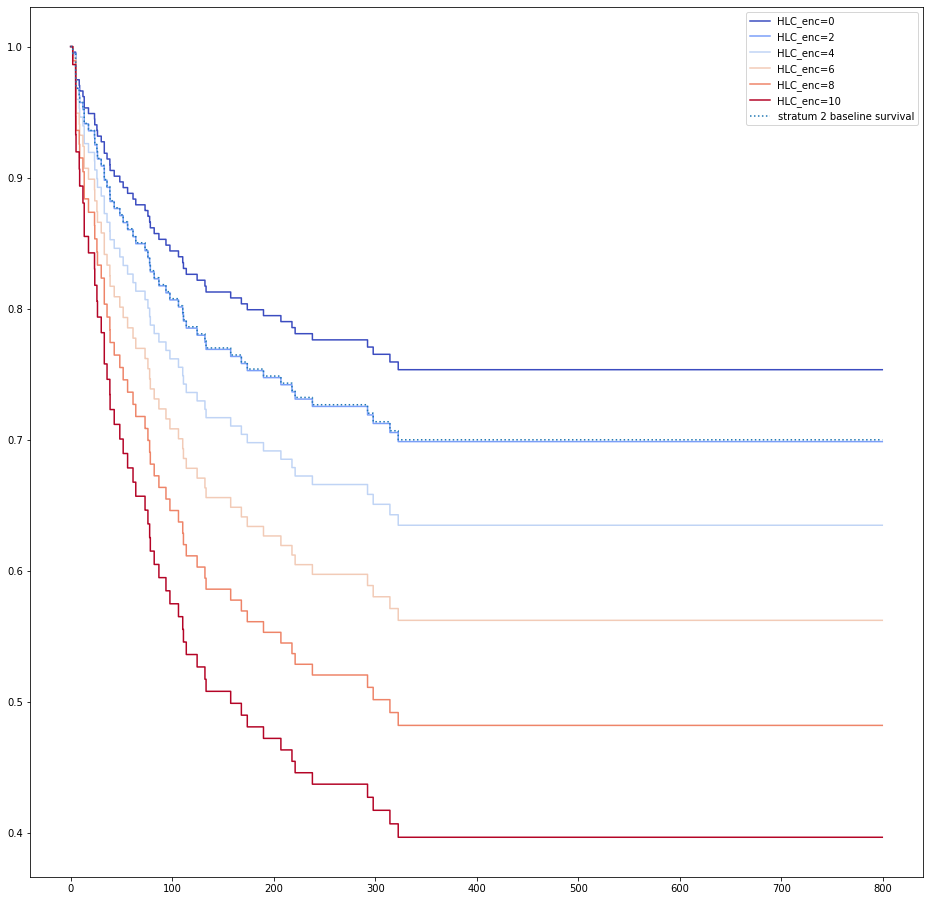

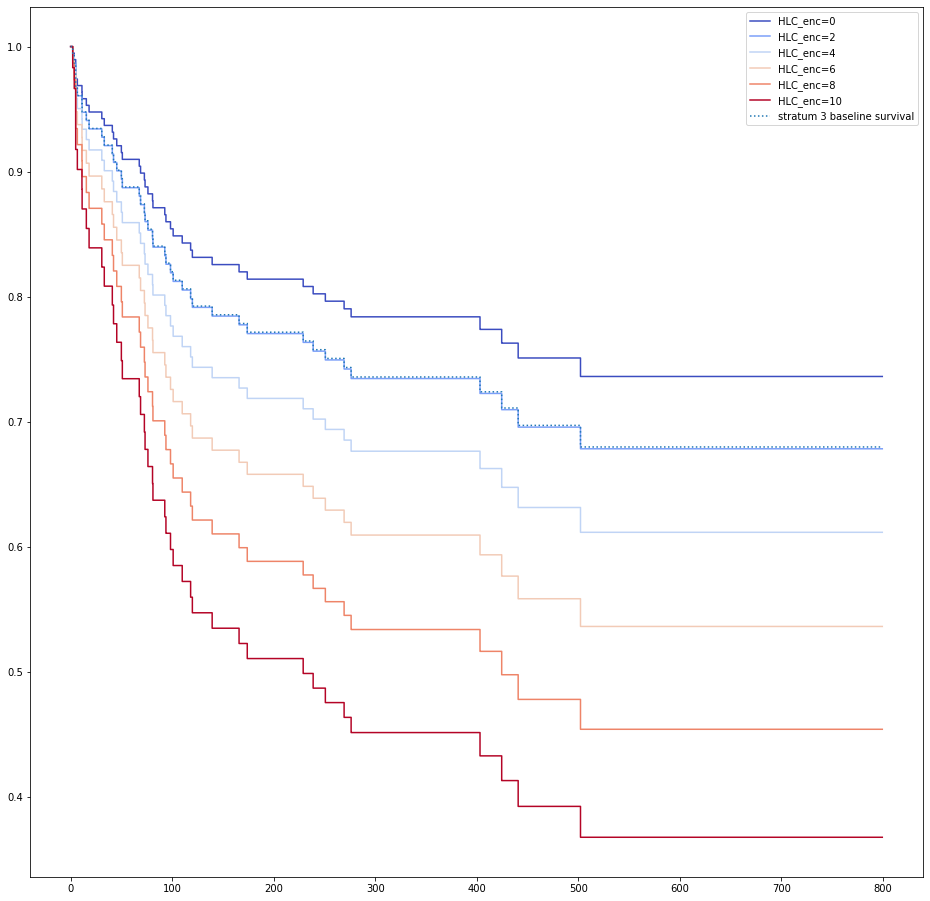

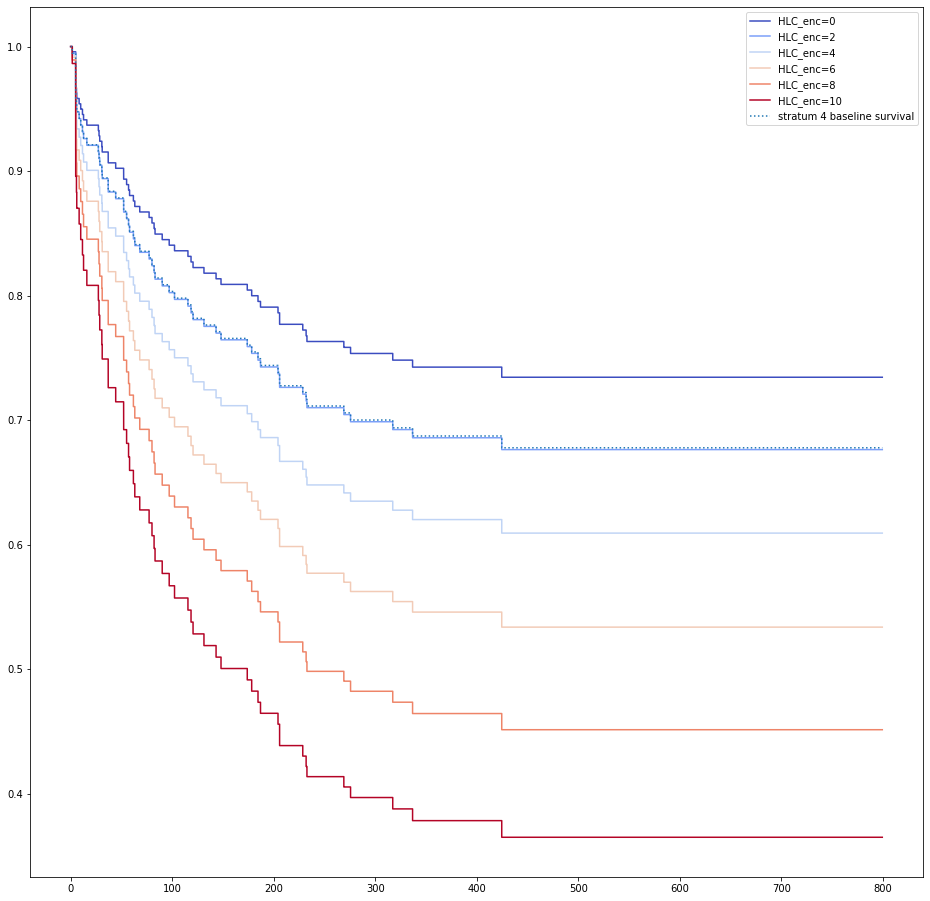

In [35]:
plt.figure(figsize=(16,16))
cph.plot_covariate_groups('HLC_enc', [0, 2, 4, 6, 8, 10], cmap='coolwarm',figsize=(16,16))

In [36]:
cph.score_

0.6132267317407313

In [37]:
cph.strata

['weather_station_enc']

In [38]:
cph.standard_errors_

ELR_enc                     0.010271
HLC_enc                     0.207003
Asset_Class_Grouping_enc    0.090041
Grouping_Full_Name_enc      0.084882
Engineering_Suffix_enc      0.017923
System_Asset_Type_enc       0.005072
EQUIP_CLASS_DESC_enc        0.010338
Sum                         0.000836
Name: se, dtype: float64

In [39]:
df_dummy.head()

,event,T,ELR_enc,HLC_enc,Asset_Class_Grouping_enc,Grouping_Full_Name_enc,Engineering_Suffix_enc,System_Asset_Type_enc,EQUIP_CLASS_DESC_enc,weather_station_enc,Sum,Asset_Number
0,0,267.106203,4,3,8,9,24,86,40,1,0.0,48075
1,1,0.791435,4,3,8,9,24,86,40,1,0.0,48081
2,1,40.656933,4,3,8,9,24,86,40,1,0.0,48081
3,1,203.419444,4,3,8,9,24,86,40,1,0.0,48081
4,0,443.199953,4,3,8,9,24,86,40,1,0.0,48081


In [40]:
censored_subjects = df_dummy.loc[~df_dummy['event'].astype(bool)]

In [42]:
censored_subjects_last_obs = censored_subjects['T']

In [46]:
cph.predict_survival_function(censored_subjects, times=[0.04,5., 25., 50.], conditional_after=censored_subjects_last_obs)

,59,77,99,129,138,139,171,172,173,219,...,866,872,884,885,899,904,917,919,924,930
0.04,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000
5.00,1.000000,0.977985,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000
25.00,0.957980,0.953970,1.000000,0.981782,1.0,0.972036,1.0,1.0,1.0,0.984397,...,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.988259
50.00,0.934456,0.925593,0.979371,0.951300,1.0,0.944315,1.0,1.0,1.0,0.984397,...,1.0,1.0,1.0,1.0,1.0,0.994789,1.0,1.0,1.0,0.975485


In [45]:
1/24

0.041666666666666664